In [12]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load data

In [13]:
from helpers import *
from model_learning import *
import datetime

In [95]:
filename = 'train.csv'
prediction, x_raw, ids = load_csv_data(filename, sub_sample=False)

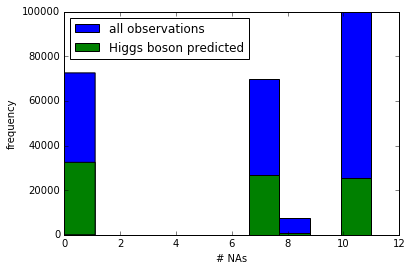

In [96]:
# get the na count per row
naCount = np.sum(x_raw == -999, axis=1)
naCountWithPred = naCount[prediction == 1] # where higgs boson was predicted
#print((naCount[naCount == 7]).shape)
plt.hist(naCount, label='all observations')
plt.hist(naCountWithPred, label='Higgs boson predicted')
plt.legend(loc='best')
plt.xlabel('# NAs')
plt.ylabel('frequency')
plt.show()

In [97]:
# replace missing values in each column with median value in this column
medians_xraw = np.median(x_raw, axis=0)
x_proc = x_raw

for col_index in range(x_raw.shape[1]):
    x_proc[x_raw[:, col_index] == -999, col_index] = medians_xraw[col_index]

# check
# x_proc[x_raw[:, col_index] == -999, :]

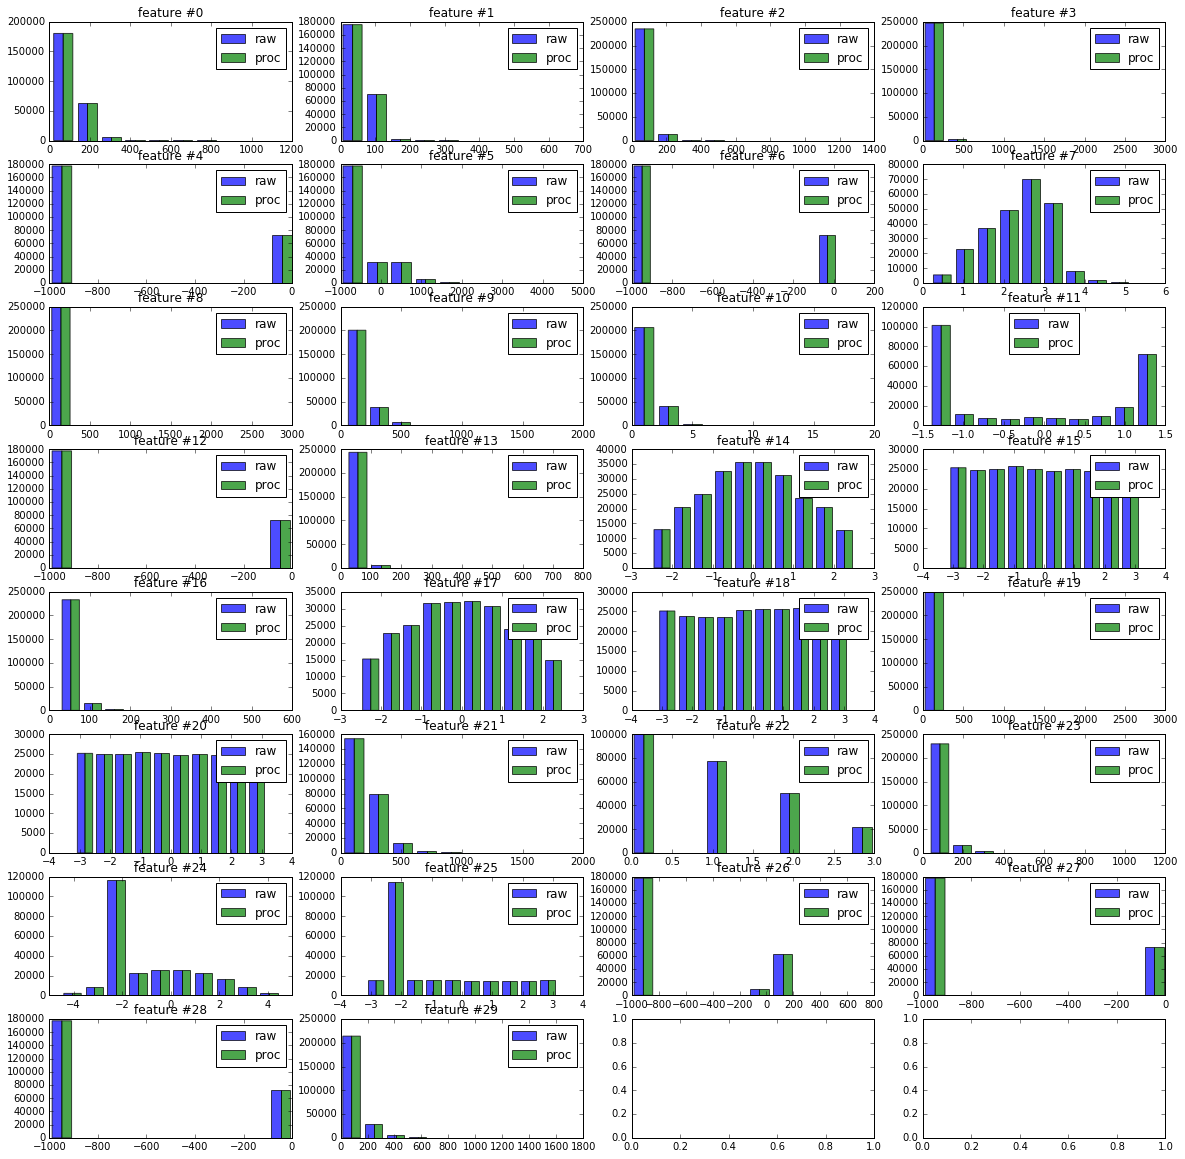

In [126]:
# plot histogram of features

nbFeatures = x_raw.shape[1]
nbCols = 4
nbRows = int(np.ceil(nbFeatures / nbCols))
f, ax = plt.subplots(nbRows, nbCols, figsize=(20,20))
for col_index in range(nbFeatures):
    ax_spec = ax[col_index // nbCols, col_index % nbCols]
    ax_spec.hist(
            [x_raw[:, col_index], x_proc[:, col_index]], label=['raw', 'proc'], alpha=0.7)
    #plt.hist(x_proc[:, col_index], label='proc', alpha=0.5)
    ax_spec.legend(loc='best')
    ax_spec.set_title("feature #{}".format(col_index))
    #break
#f.show()

In [98]:
# safety check
x_proc[x_proc[:, col_index] < 0, :]

array([], shape=(0, 30), dtype=float64)

In [297]:
# ignore features according to above
featuresToIgnore = [8, 23] # starting from zero
x_proc2 = np.delete(x_proc, featuresToIgnore, axis=1)
print(x_proc.shape)
print(x_proc2.shape)

(250000, 30)
(250000, 28)


In [427]:
tx, mean_x, std_x = standardize(x_proc2)

In [414]:
# TODO: preprocess data, remove -999
max(1,2)
tx.shape

(250000, 28)

In [415]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x_proc.T)

PCA(copy=True, n_components=2, whiten=False)

In [416]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)
print(pca.components_.shape)

[ 0.96367082  0.02784767]
[  3.41575751e+10   9.87068263e+08]
(2, 250000)


In [178]:
def sample_data(x, seed, size_samples):
    """sample from dataset."""
    np.random.seed(seed)
    num_observations = x.shape[0]
    random_permuted_indices = np.random.permutation(num_observations)
    #y = y[random_permuted_indices]
    x = x[random_permuted_indices]
    return x[:size_samples] #y[:size_samples], 

In [214]:
# sampled data to reduce plotting time
sampled_x_proc = sample_data(x_proc, seed=None, size_samples=2000)

# run it only if you have time (approx. 30 seconds), replace 0 below
nbFeatures = 0#10#x_raw.shape[1]
nbCols = 4
nbRows = int(np.ceil(nbFeatures * nbFeatures / nbCols))
f, ax = plt.subplots(nbRows, nbCols, figsize=(20, 5 * nbRows))
for feat1 in range(nbFeatures):
    print("feature #{}".format(feat1))
    for feat2 in range(nbFeatures):
        if feat2 == feat1:
            continue
        plotIndex = feat1 * nbFeatures + feat2
        #print(ax.shape)
        ax_spec = ax[plotIndex // nbCols, plotIndex % nbCols]
        ax_spec.scatter(sampled_x_proc[:, feat1], sampled_x_proc[:, feat2])
        #ax_spec.legend(loc='best')
        ax_spec.set_xlabel('feature #{}'.format(feat1))
        ax_spec.set_ylabel('feature #{}'.format(feat2))
        ax_spec.set_title("features #{}-#{}".format(feat1, feat2))
        
f.savefig('correlations.png')

IndexError: index out of range

In [184]:
#f.savefig('correlations.png')

In [245]:
def split_data(x, y, ratio, seed=1):
    """split the dataset based on the split ratio."""
    # set seed
    np.random.seed(seed)
    p = np.random.permutation(len(x))
    x_tr, x_te = np.split(x[p], [int(ratio*len(x))])
    y_tr, y_te = np.split(y[p], [int(ratio*len(x))])
    return x_tr, y_tr, x_te, y_te

In [428]:
k_fold = 5
k = 2
y = np.repeat([1], repeats=[40])
k_indices = build_k_indices(y, k_fold, seed=1)
tr_indices = np.ravel(np.concatenate([k_indices[:k].ravel(), k_indices[k+1:].ravel()]))
#print(type(k_indices[:3]))
#print(k_indices[:k])
#print(np.concatenate(k_indices[:k], axis=0))
#print(np.concatenate(k_indices[k+1:], axis=0))

print(tr_indices)
np.concatenate((k_indices[:k].ravel(), k_indices[k+1:].ravel()))
#np.concatenate((np.concatenate(k_indices[:k], axis=0), np.concatenate(k_indices[k+1:], axis=0)))
#np.concatenate(np.concatenate((k_indices[:k], k_indices[k+1:]), axis=1))
#np.hstack(k_indices[:k], k_indices[k+1:])

[ 2 31  3 21 27 29 22 39 19 26 32 17 30 36 33 28 18 25  6 13  7 38  1 16  0
 15  5 11  9  8 12 37]


array([ 2, 31,  3, 21, 27, 29, 22, 39, 19, 26, 32, 17, 30, 36, 33, 28, 18,
       25,  6, 13,  7, 38,  1, 16,  0, 15,  5, 11,  9,  8, 12, 37])

In [435]:
tx.shape

(250000, 28)

In [468]:
#from plots import gradient_descent_visualization
from costs import *
from model_learning import *

nbFeatures = tx.shape[1]

# Define the parameters of the algorithm.
max_iters = 500000
gamma = 0.01
# Initialization

max_iters = 2500
gamma = 0.05
batch_size = 1000
degree = 1

max_iters = 2500
gamma = 0.05
batch_size = 50#int(tx.shape[0]/100)
degree = 1
w_initial = [10] * nbFeatures

# Start gradient desceniit.
start_time = datetime.datetime.now()
#weights = gradient_descent(prediction, tx, w_initial, max_iters, gamma)

#compute_weightsFunctionMSE = lambda y, tx, lambdaIgnored: least_squares_weights(
#        y, tx, gamma=gamma, max_iters=max_iters, batch_size=batch_size)
compute_weightsFunctionMSE = lambda y, tx, lambdaIgnored: exact_least_squares_weights(y, tx)
#weights = stochastic_gradient_descent(prediction, tx, w_initial, batch_size=200, max_iters=max_iters, 
#                                      gamma=gamma, compute_gradientFunction=compute_mse_gradient, compute_lossFunction=compute_mse_loss)

(rmse_tr, rmse_te) = k_cross_validation(prediction, tx, k_fold=5, lambda_=0, degree=degree, seed=1, 
    compute_weightsFunction=compute_weightsFunctionMSE, compute_lossFunction=compute_mse_loss)

compute_weightsFunctionMAE = lambda y, tx, lambdaIgnored: mae_weights(
        y, tx, gamma=gamma, max_iters=max_iters, batch_size=batch_size)
(rmse_tr, rmse_te) = k_cross_validation(prediction, tx, k_fold=5, lambda_=0, degree=degree, seed=1, 
    compute_weightsFunction=compute_weightsFunctionMAE, compute_lossFunction=compute_mae_loss)


end_time = datetime.datetime.now()


print((rmse_tr, rmse_te))
# Print result
execution_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=execution_time))

Stochastic Gradient Descent(0/2499): loss=109.63266419145272, w0=9.998, w1=9.990668613451806
Stochastic Gradient Descent(125/2499): loss=67.18916812374951, w0=11.067999999999989, w1=8.540488416679054
Stochastic Gradient Descent(250/2499): loss=36.47890665497798, w0=11.175999999999986, w1=6.7306565523827375
Stochastic Gradient Descent(375/2499): loss=24.316446329891164, w0=10.094, w1=4.898592800583484
Stochastic Gradient Descent(500/2499): loss=18.398302663987774, w0=8.60800000000002, w1=2.8881610034082383
Stochastic Gradient Descent(625/2499): loss=13.2591529089408, w0=6.686000000000037, w1=1.059193424702188
Stochastic Gradient Descent(750/2499): loss=8.905676149955022, w0=4.6840000000000455, w1=-0.4329930962176748
Stochastic Gradient Descent(875/2499): loss=5.527172109164391, w0=2.540000000000057, w1=-1.5032222876330223
Stochastic Gradient Descent(1000/2499): loss=3.3278534515657165, w0=0.7840000000000591, w1=-1.7025162678215977
Stochastic Gradient Descent(1125/2499): loss=2.057890212

KeyboardInterrupt: 

In [322]:
arr = np.array([[1, 2, 4], [2, 3, 4]])
degree = 3
res = build_poly(arr, degree)
print(res.shape)

(2, 12)


In [567]:
# now implement cross-validation
from model_learning import *
from costs import *
from cross_validation import k_cross_validation
from build_polynomial import *


# define parameters
seeds = range(2)#range(100)
ratio_train = 0.05#0.005 #TODO: change
degrees = [1,2,3,4]#range(1, 10)
lambdas = [0]#np.logspace(-4,10,30)#np.logspace(-4, 2, 30)
k_fold = 5 # used to determine best lambda for given degree (and seed)



def get_percentage_correct(y, tx, w):
    return np.mean(y == np.sign(tx.dot(w)))

def cross_validation_extract_weights(seeds, ratio_train, degrees, lambdas, k_fold):
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    max_iters = 2000
    gamma = 0.001
    batch_size = 200
    #compute_weightsFunction = lambda y, tx, lamb: ridge_regression_least_squares_weights(
    #    y, tx, lamb, gamma, max_iters, batch_size=batch_size)
    #compute_weightsFunction = exact_ridge_regression_least_squares
    #compute_lossFunction = compute_mse_loss
    
    compute_weightsFunction = lambda y, tx, lamb: ridge_regression_logistic_weights(
        y, tx, lamb, gamma, max_iters, batch_size=batch_size)
    compute_lossFunction = compute_logistic_loss
    
    # we later on average over the seeds
    for index_seed, seed in enumerate(seeds):
        print("Starting with seed #{}".format(index_seed))
        
        (x_tr, y_tr, x_te, y_te) = split_data(tx, prediction, ratio_train, seed=seed)
        
        #print(x_tr.shape)
        #print(y_tr.shape)
        #print(compute_lossFunction(y_tr, x_tr, np.repeat(0, x_tr.shape[1])))
        
        for index_degree, degree in enumerate(degrees):
            
            # find optimal lambda for this degree by using training set only
            
            cross_rmse_lambdas = []
            for lambda_ in lambdas:
                print("Taking degree {}, lambda {}".format(degree, lambda_))
                (cross_rmse_tr, cross_rmse_te) = k_cross_validation(
                    y_tr, x_tr, k_fold, lambda_, degree, seed,
                    compute_weightsFunction=compute_weightsFunction, compute_lossFunction=compute_lossFunction)
                
                # we are only interested in the error on the test set (part of the training set)
                cross_rmse_lambdas.append(cross_rmse_te)
            # best lambda corresponds to lambda minimising the testing error for 
            # k-fold validation on the training set
            bestLambda = lambdas[np.argmin(cross_rmse_lambdas)]
            
            # add polynomial features
            x_poly_tr = build_poly(x_tr, degree)
            x_poly_te = build_poly(x_te, degree)
                 
            # compute weights with ridge_regression on training set with given lambda (and degree)
            weights_tr = compute_weightsFunction(y_tr, x_poly_tr, lamb = bestLambda)
            # find the testing error
            mse_tr = compute_lossFunction(y_tr, x_poly_tr, weights_tr)
            mse_te = compute_lossFunction(y_te, x_poly_te, weights_tr)
            rmse_tr_val = np.sqrt(2*mse_tr)
            rmse_te_val = np.sqrt(2*mse_te)
            
            #rmse_tr_val = get_percentage_correct(y_tr, x_poly_tr, weights_tr)
            #rmse_te_val = get_percentage_correct(y_te, x_poly_te, weights_tr)
                    
            rmse_tr[index_seed, index_degree] = rmse_tr_val
            rmse_te[index_seed, index_degree] = rmse_te_val
            
    # mean over all seeds, then just have for each degree
    mean_rmse_tr = np.mean(rmse_tr, axis=0)
    mean_rmse_te = np.mean(rmse_te, axis=0)
    
    return (mean_rmse_tr, mean_rmse_te)



(mean_rmse_tr, mean_rmse_te) = cross_validation_extract_weights(seeds, ratio_train, degrees, lambdas, k_fold)

bestDegree = degrees[np.argmin(mean_rmse_te)]
#bestDegree = degrees[np.argmax(mean_rmse_te)]

#seed = np.random.seed()
print(bestDegree)
    
print(mean_rmse_tr)
print(mean_rmse_te)

Starting with seed #0
Taking degree 1, lambda 0
83138.5653883
Stochastic Gradient Descent(0/1999): loss=473604.17641163094, w0=9.856339430598211, w1=9.913858518473363
97723.5172719
26227.0102422
90070.219415
96526.2192862
52610.0383004
46946.3708658
68685.9890075
76774.8834755
85308.2199072
45155.4688242
41013.6723214
66966.3749915
74134.0685153
67929.120994
54648.3850278
42687.0234501
48200.8600043
56726.230783
43534.2852736
49673.6098766
41559.6975658
48419.1464798
148861.796536
52675.3949156
79977.67303
41001.32062
66790.9247752
58898.4779433
97550.815205
73018.1879972
65960.1061839
46481.7453784
51862.411011
65911.2968933
52300.3442393
70757.3435535
41864.9412835
55405.5576002
77349.9944822
40526.0106118
73047.0694724
56074.7917207
78154.2800215
61368.0878352
77861.3196228
37104.0094537
39619.8130874
105995.001051
85139.7685744
51812.9592927
31793.3014567
84912.4432816
37523.1016724
111597.116427
38091.5433813
59593.5560173
106541.526727
69010.3876448
80900.7725756
50518.7383931
41

KeyboardInterrupt: 

In [533]:
t = np.array([-20000000, 20000000000, 1]).T
sigmoid(t)

[  -20000000 20000000000           1]


array([ 0.        ,  1.        ,  0.73105858])

In [508]:
print(mean_rmse_tr)
print(mean_rmse_te)

bestDegree = degrees[np.argmax(mean_rmse_te)]
print(bestDegree)

[ 0.7482  0.7742  0.78    0.7404]
[ 0.73925455  0.76257778  0.7725899   0.73132929]
3


In [ ]:
final_weights = weights[-1]

In [26]:
filenameNew = 'test.csv'
prediction_wrong, x_new_raw, ids_new = load_csv_data(filenameNew, sub_sample=False)

tx_new, mean_x_new, std_x_new = standardize(x_new_raw, mean_x=mean_x, std_x=std_x)

y_pred = predict_labels(final_weights, tx_new)

create_csv_submission(ids_new, y_pred, 'submission.csv')

In [218]:
f = lambda x,y: print(y, x, y)
f(1,2)

2 1 2


In [27]:
! du -h submission.csv test.csv
#! cat submission.csv | head

5.9M	submission.csv
105M	test.csv


In [28]:
y_pred == 1

array([False, False, False, ..., False,  True, False], dtype=bool)

In [35]:
#len(tx_new)
#len(x_new_raw)
#len(prediction_wrong)
len(y_pred)
len(ids_new)

568238

In [1]:
cat submission.csv | head











cat: write error: Broken pipe
